# Método de la Falsa Posición en Cálculo Numérico

## Introducción

El método de la falsa posición, también conocido como *regula falsi*, es una técnica numérica utilizada para encontrar las raíces de una función. 

Este método **combina elementos del método de bisección y del método de la secante**, ofreciendo una convergencia más rápida que la bisección en muchos casos.


### Contexto histórico

El método de la falsa posición tiene sus raíces en la antigüedad. Los babilonios ya utilizaban una versión rudimentaria de este método alrededor del 1800 a.C. Sin embargo, fue formalizado y popularizado en el Renacimiento por matemáticos como Vieta y Galileo.

### Características principales:

- Es un método cerrado (requiere dos puntos iniciales que encierren la raíz).
- Utiliza una interpolación lineal para estimar la raíz.
- En cada iteración, reemplaza uno de los puntos iniciales con la nueva estimación.
- Garantiza la convergencia si la función es continua en el intervalo inicial.

## Fundamentos teóricos

El método de la falsa posición se basa en la idea de aproximar la función por una línea recta y encontrar el punto donde esta línea cruza el eje x.

El método funciona trazando una línea recta entre los puntos (a, f(a)) y (b, f(b)), y encontrando dónde esta línea cruza el eje x. Este punto de cruce se convierte en la nueva estimación de la raíz.


![](./img/False_position_method.svg)

**Figura 1** Las primeras dos iteraciones de regula falsi. La curva roja muestra la función f; las líneas azules, las secantes.


### Concepto básico

Dada una función $f(x)$ y dos puntos $a$ y $b$ tales que $f(a)$ y $f(b)$ tienen signos opuestos, el método aproxima la raíz $r$ en el intervalo $[a,b]$.


### Fórmula principal

La formula se calcula usando **triángulos semejantes** (figura), la intersección de la línea recta con el eje de las x
se estima mediante $x_r$

![](./img/triangulos_equivalentes.png)

 $x_r$ se obtiene a partir del despeje de la igualdad de los triangulos semejantes:
 
$$ \frac{f(x_l)}{x_r-x_l} = \frac{f(x_u)}{x_r-x_u}$$

y deséjando $x_r$

$$ x_r = x_u - \frac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}$$

La fórmula para calcular la siguiente aproximación $x_n$ es:

$$ x_n = b - \frac{f(b)(b-a)}{f(b)-f(a)} $$


### Seudo Código
```
Función FalsaPosicion(f, a, b, tolerancia, max_iteraciones)
    Si f(a) * f(b) >= 0 entonces
        Retornar error "La función no cambia de signo en el intervalo"
    Fin Si

    Para i = 1 hasta max_iteraciones hacer
        c = b - f(b) * (b - a) / (f(b) - f(a))
        
        Si |f(c)| < tolerancia entonces
            Retornar c
        Fin Si

        Si f(a) * f(c) < 0 entonces
            b = c
        Sino
            a = c
        Fin Si
    Fin Para

    Retornar error "Método no convergió en el número máximo de iteraciones"
Fin Función
```











### Criterio de convergencia

El método continúa hasta que se cumple un criterio de error preestablecido, generalmente:

$$ \left|\frac{x_n - x_{n-1}}{x_n}\right| < \epsilon $$

donde $\epsilon$ es la tolerancia deseada.

## Implementación en Python

A continuación, se presenta una implementación del método de la falsa posición en Python:


In [3]:
import numpy as np

def falsa_posicion(f, a, b, tol=1e-6, max_iter=100):
    """
    Implementa el método de la falsa posición.
    
    Parámetros:
    f : función de la cual se busca la raíz
    a, b : límites del intervalo inicial
    tol : tolerancia (error relativo)
    max_iter : número máximo de iteraciones
    
    Retorna:
    x : aproximación de la raíz
    iter : número de iteraciones realizadas
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    
    for i in range(max_iter):
        x = b - f(b) * (b - a) / (f(b) - f(a))
        
        if abs((x - b) / x) < tol:
            return x, i
        
        if f(x) * f(b) < 0:
            a = x
        else:
            b = x
    
    raise RuntimeError("El método no convergió después de {} iteraciones".format(max_iter))

# Ejemplo de uso
def f(x):
    return x**3 - x*2 - 2

root, iterations = falsa_posicion(f, 1, 2)
print(f"Raíz aproximada: {root}")
print(f"Iteraciones: {iterations}")

Raíz aproximada: 1.7692923542386314
Iteraciones: 20


Este código implementa el método de la falsa posición y lo aplica a la función $f(x) = x^3 - x - 2$.

## Ejemplo práctico

Consideremos un problema de ingeniería donde necesitamos encontrar el punto de equilibrio de un sistema mecánico modelado por la ecuación:

$$ f(x) = x^3 - 6x^2 + 11x - 6 = 0 $$

Sabemos que la raíz está en el intervalo [0, 1].

El punto de equilibrio está en x ≈ 3.000000
Se requirieron 45 iteraciones


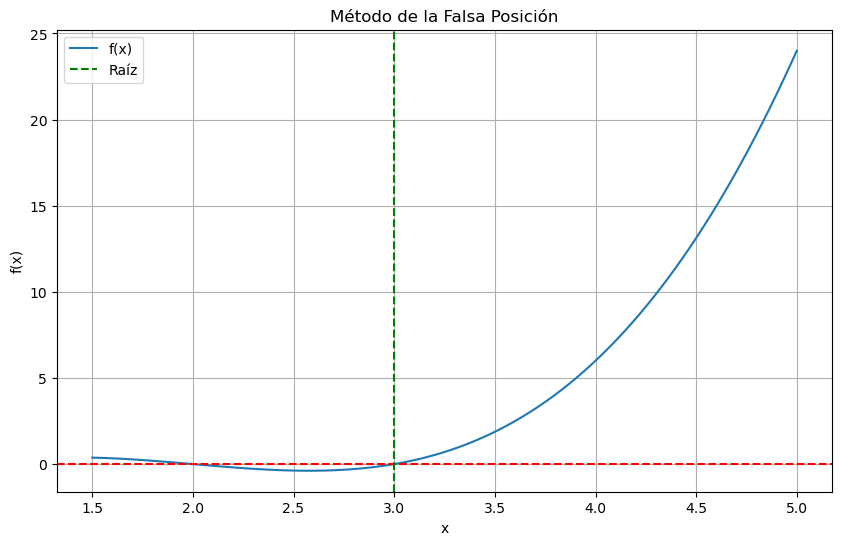

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 6*x**2 + 11*x - 6

# Aplicamos el método de la falsa posición
root, iterations = falsa_posicion(f, 2.5, 3.5)

print(f"El punto de equilibrio está en x ≈ {root:.6f}")
print(f"Se requirieron {iterations} iteraciones")

# Visualización
x = np.linspace(1.5, 5, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=root, color='g', linestyle='--', label='Raíz')
plt.title('Método de la Falsa Posición')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Este código resuelve el problema y genera una visualización del resultado.

## Ejercicios propuestos

1. Encuentra la raíz de la ecuación $f(x) = e^x - 3x^2$ en el intervalo [0, 1] usando el método de la falsa posición. Compara el número de iteraciones necesarias con el método de bisección.

2. Modifica la implementación del método de la falsa posición para que muestre los valores intermedios en cada iteración. Aplícalo a la función $f(x) = \cos(x) - x$ en el intervalo [0, π/2].

3. Implementa una versión del método de la falsa posición que use un criterio de parada basado en el valor de $|f(x)|$ en lugar del error relativo. Pruébalo con la función $f(x) = x^2 - 2$ para encontrar $\sqrt{2}$.

## Conclusión

El método de la falsa posición es una herramienta poderosa en el cálculo numérico, especialmente útil en problemas de ingeniería donde se requiere encontrar raíces de funciones no lineales. Sus principales ventajas son:

- Convergencia más rápida que el método de bisección en muchos casos.
- Garantía de convergencia si la función es continua y cambia de signo en el intervalo inicial.

Sin embargo, también tiene algunas limitaciones:

- Puede ser más lento que métodos abiertos como Newton-Raphson para funciones bien comportadas.
- En algunos casos, puede sufrir de convergencia lenta si uno de los extremos del intervalo se "estanca".


![](./img/estancamiento_metodo.png)

En la práctica, el método de la falsa posición es a menudo una buena elección cuando se necesita un método robusto y se tiene una estimación inicial del intervalo que contiene la raíz.

## Referencias

1. Burden, R. L., & Faires, J. D. (2010). Numerical Analysis (9th ed.). Brooks/Cole.
2. Chapra, S. C., & Canale, R. P. (2015). Numerical Methods for Engineers (7th ed.). McGraw-Hill Education.
3. Heath, M. T. (2018). Scientific Computing: An Introductory Survey (2nd ed.). SIAM.
4. Kaw, A., & Kalu, E. (2008). Numerical Methods with Applications. http://nm.mathforcollege.com/
5. Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge University Press.
6. https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_regla_falsa
